# Visualise and Analyse Final Dataset

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

import statsmodels.formula.api as smf

The lastest year with most data available is **2014**. Whenever a year is to be chosen, analysis will be conducted for  this year. Will use a range if it is necessary to generalise, acquire more results, this is another reason that a variable is used instead of hard coding.

In [3]:
magic_year = 2014

In [4]:
ds = pd.read_csv("project_data.csv")

ds.head()

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score
0,Aruba,ABW,2011,25324.720363,NaN,NaN
1,Afghanistan,AFG,2011,603.537023,NaN,2.48
2,Angola,AGO,2011,4299.012889,5.13,3.32
3,Albania,ALB,2011,4437.178068,7.25,5.81
4,Andorra,AND,2011,40919.183279,NaN,NaN


In [5]:
ds[ds['Country Name'] == 'OECD members']

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score


In [6]:
ds.columns

Index([u'Country Name', u'Country Code', u'Year', u'GDP',
       u'Economic Freedom Index', u'Democracy Score'],
      dtype='object')

Decided not to include 2015 and 2016

In [7]:
print(len(ds))
ds = ds[ds.Year < 2015]
print(len(ds))

1392
928


## Visualise and Describe Democracy, GDP, and a Financial Liberties values for a single year

### GDP

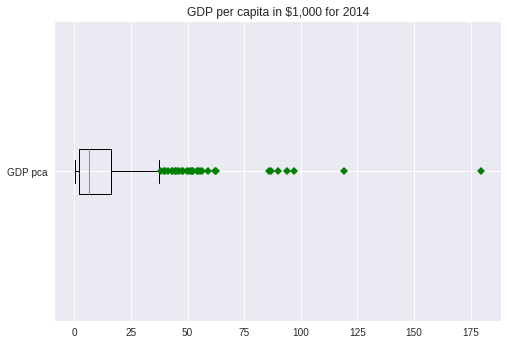

In [8]:
gdp_data = ds[ds['Year'] == magic_year]['GDP'].dropna()

# gdp_data

plt.figure()
plt.boxplot([gdp_data / 1000], 0, 'gD', 0, labels=["GDP pca"])
plt.title("GDP per capita in $1,000 for %s" % magic_year)
plt.show()

In [9]:
gdp_data.describe()

count       210.000000
mean      15603.330164
std       23682.648418
min         312.748979
25%        2011.630303
50%        6350.454330
75%       16360.190030
max      179478.584828
Name: GDP, dtype: float64

In [10]:
gdp_data.var()

560867836.0772458

In [11]:
kgdp = map(int, gdp_data / 1000)
# print(kgdp)
mode(kgdp)

ModeResult(mode=array([0]), count=array([26]))

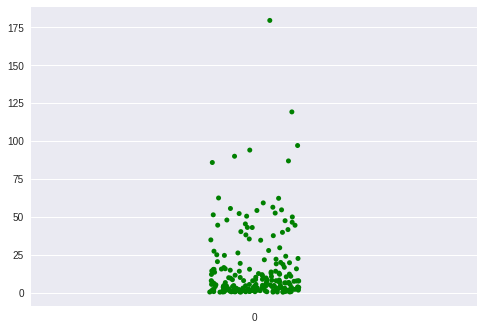

In [12]:
sns.stripplot(data=(gdp_data.values / 1000), jitter=True, color="g")

### Economic Freedom

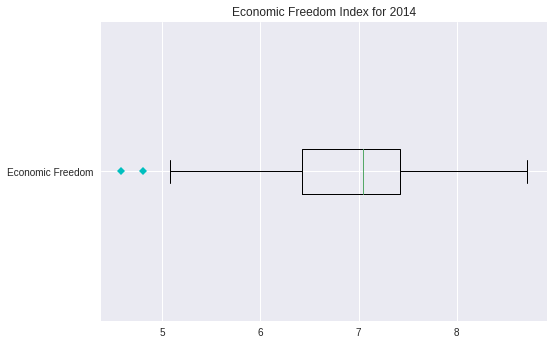

In [13]:
economic_freedom = ds[ds['Year'] == magic_year]['Economic Freedom Index'].dropna()

# econ_freedom_data

plt.figure()
plt.boxplot([economic_freedom], 0, 'cD', 0, labels=["Economic Freedom"])
plt.title("Economic Freedom Index for %s" % magic_year)
plt.show()

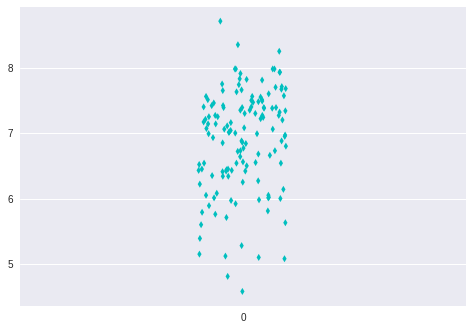

In [14]:
sns.stripplot(data=economic_freedom.values, jitter=True, color="c", marker="d")

In [15]:
economic_freedom.describe()

count    137.000000
mean       6.889343
std        0.783723
min        4.580000
25%        6.420000
50%        7.040000
75%        7.420000
max        8.710000
Name: Economic Freedom Index, dtype: float64

In [16]:
economic_freedom.var()

0.6142223593817091

In [17]:
economic_freedom_ints = map(int, economic_freedom)
# print(economic_freedom_ints)
mode(economic_freedom_ints)

ModeResult(mode=array([7]), count=array([69]))

## Civil Freedom

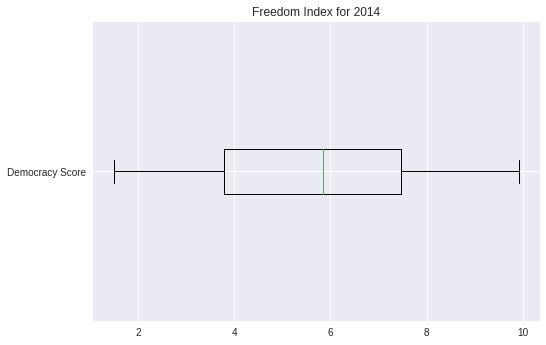

In [18]:
civil_freedom = ds[ds['Year'] == magic_year]['Democracy Score'].dropna()

# civil_freedom_data

plt.figure()
plt.boxplot([civil_freedom], 0, 'bD', 0, labels=["Democracy Score"])
plt.title("Freedom Index for %s" % magic_year)
plt.show()

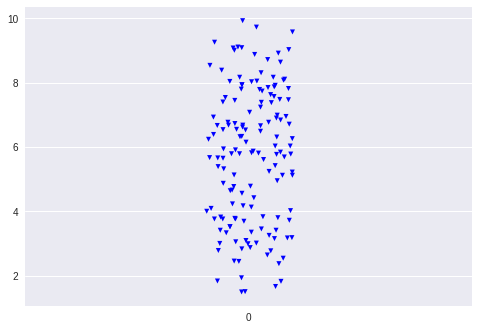

In [19]:
sns.stripplot(data=civil_freedom.values, jitter=True, color="b", marker="v")

In [20]:
civil_freedom.describe()

count    147.000000
mean       5.719728
std        2.113611
min        1.490000
25%        3.790000
50%        5.840000
75%        7.460000
max        9.930000
Name: Democracy Score, dtype: float64

In [21]:
civil_freedom.var()

4.467350610381141

In [22]:
civil_freedom_ints = map(int, civil_freedom)
# print(civil_freedom_ints)
mode(civil_freedom_ints)

ModeResult(mode=array([6]), count=array([27]))

## Visualise relationships

In [23]:
df_viz1 = ds.dropna()

# Per usual divide GDP w. 1000
df_viz1['GDP'] = df_viz1['GDP'] / 1000

df_viz1.head()

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score
2,Angola,AGO,2011,4.299013,5.13,3.32
3,Albania,ALB,2011,4.437178,7.25,5.81
7,Argentina,ARG,2011,12.726908,5.67,6.84
8,Armenia,ARM,2011,3.526978,7.71,4.09
11,Australia,AUS,2011,62.245100,7.93,9.22


/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


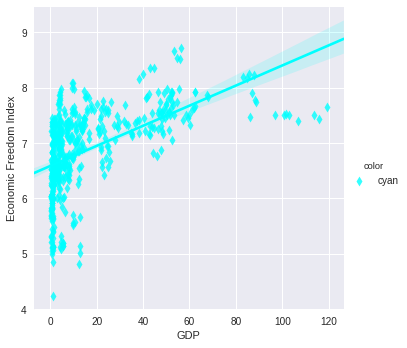

In [24]:
df_viz1['color'] = 'cyan'

sns.lmplot('GDP', 'Economic Freedom Index', df_viz1, line_kws={'color': 'cyan'}, markers=["d"],
           hue="color", palette=dict(cyan="cyan"))

/home/archon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


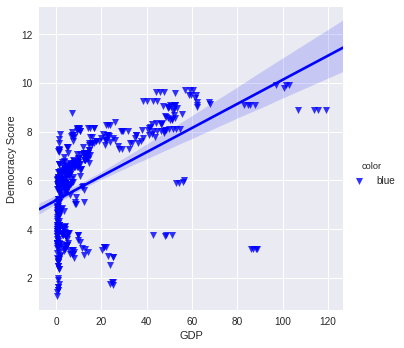

In [25]:
df_viz1['color'] = 'blue'

sns.lmplot('GDP', 'Democracy Score', df_viz1,
           line_kws={'color': 'blue'}, markers=["v"],
           hue="color", palette=dict(blue="blue"))

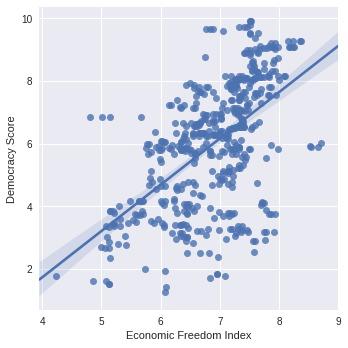

In [26]:
sns.lmplot('Economic Freedom Index', 'Democracy Score', df_viz1)

### Correlation Heatmap

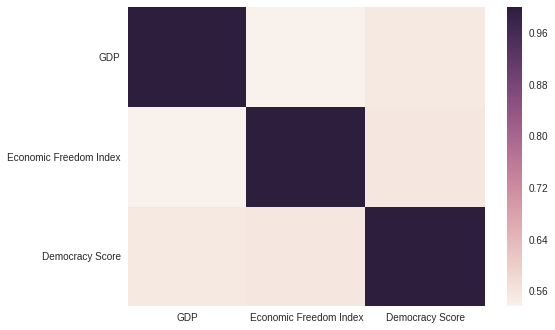

In [27]:
correlations = df_viz1[['GDP', 'Economic Freedom Index', 'Democracy Score']].corr()
sns.heatmap(correlations)

## Relationships summaries

In [28]:
df_ = df_viz1.rename(columns={
    'Economic Freedom Index': 'EconomicFreedomIndex',
    'Democracy Score': 'DemocracyScore'
})

lm = smf.ols(formula='GDP ~ EconomicFreedomIndex + DemocracyScore', data=df_).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 28 Aug 2017   Prob (F-statistic):           1.93e-53
Time:                        10:50:40   Log-Likelihood:                -2182.3
No. Observations:                 509   AIC:                             4371.
Df Residuals:                     506   BIC:                             4383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -76.0992      7.435    -10.236      0.000     -90.705     -61.493
EconomicFreedomIndex     9.8418      1.249      7.883      0.000       7.389      12.295
DemocracyScore           4.0972      0.471      8.695      0.000       3.171       5.023
==============================================================================
Omnibus:                      207.274   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.816
Skew:                           1.841   Prob(JB):                    1.18e-182
Kurtosis:                       8.094   Cond. No.                         89.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normalise dataset

Divide by max

In [29]:
ds.head()

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score
0,Aruba,ABW,2011,25324.720363,NaN,NaN
1,Afghanistan,AFG,2011,603.537023,NaN,2.48
2,Angola,AGO,2011,4299.012889,5.13,3.32
3,Albania,ALB,2011,4437.178068,7.25,5.81
4,Andorra,AND,2011,40919.183279,NaN,NaN


In [30]:
max_freedom = ds['Economic Freedom Index'].dropna().values.max()

max_freedom

8.7100000000000009

In [31]:
max_democracy = ds['Democracy Score'].dropna().values.max()

max_democracy

9.9299999999999997

In [32]:
max_gdp = ds['GDP'].dropna().values.max()

max_gdp

179478.58482799999

In [33]:
ds['economic_freedom_ratio'] = ds['Economic Freedom Index'] / max_freedom

In [34]:
ds['democracy_ratio'] = ds['Democracy Score'] / max_democracy

In [35]:
ds['gdp_ratio'] = ds['GDP'] / max_gdp

In [36]:
ds.head(10)

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score,economic_freedom_ratio,democracy_ratio,gdp_ratio
0,Aruba,ABW,2011,25324.720363,NaN,NaN,NaN,NaN,0.141102
1,Afghanistan,AFG,2011,603.537023,NaN,2.48,NaN,0.249748,0.003363
2,Angola,AGO,2011,4299.012889,5.13,3.32,0.588978,0.334340,0.023953
3,Albania,ALB,2011,4437.178068,7.25,5.81,0.832377,0.585096,0.024723
4,Andorra,AND,2011,40919.183279,NaN,NaN,NaN,NaN,0.227989
5,Arab World,ARB,2011,6856.593678,NaN,NaN,NaN,NaN,0.038203
6,United Arab Emirates,ARE,2011,40462.312090,NaN,2.58,NaN,0.259819,0.225444
7,Argentina,ARG,2011,12726.908359,5.67,6.84,0.650976,0.688822,0.070910
8,Armenia,ARM,2011,3526.978143,7.71,4.09,0.885189,0.411883,0.019651
9,American Samoa,ASM,2011,10375.994216,NaN,NaN,NaN,NaN,0.057812


Harmonic mean from
<https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.hmean.html>

In [37]:
from scipy.stats import hmean

In [38]:
def mask_hmean(row):
    er = row['economic_freedom_ratio']
    dr = row['democracy_ratio']
    if er > 0 and dr > 0:
        return hmean([er, dr])
    else:
        return None

In [39]:
ds['freedoms_mean'] = ds.apply(mask_hmean, axis=1)

In [40]:
ds[0:4]

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score,economic_freedom_ratio,democracy_ratio,gdp_ratio,freedoms_mean
0,Aruba,ABW,2011,25324.720363,NaN,NaN,NaN,NaN,0.141102,NaN
1,Afghanistan,AFG,2011,603.537023,NaN,2.48,NaN,0.249748,0.003363,NaN
2,Angola,AGO,2011,4299.012889,5.13,3.32,0.588978,0.334340,0.023953,0.426547
3,Albania,ALB,2011,4437.178068,7.25,5.81,0.832377,0.585096,0.024723,0.687167


In [41]:
len(ds)

928

In [43]:
ds_wo_na = ds.dropna()

len(ds_wo_na)

509

In [44]:
ds_wo_na.head()

,Country Name,Country Code,Year,GDP,Economic Freedom Index,Democracy Score,economic_freedom_ratio,democracy_ratio,gdp_ratio,freedoms_mean
2,Angola,AGO,2011,4299.012889,5.13,3.32,0.588978,0.334340,0.023953,0.426547
3,Albania,ALB,2011,4437.178068,7.25,5.81,0.832377,0.585096,0.024723,0.687167
7,Argentina,ARG,2011,12726.908359,5.67,6.84,0.650976,0.688822,0.070910,0.669364
8,Armenia,ARM,2011,3526.978143,7.71,4.09,0.885189,0.411883,0.019651,0.562181
11,Australia,AUS,2011,62245.100292,7.93,9.22,0.910448,0.928499,0.346811,0.919385


## Construct linear model from available data

In [45]:
import statsmodels.formula.api as smf

### gdp &rarr; democracy &amp; gdp

In [47]:
lm1 = smf.ols(formula='gdp_ratio ~ democracy_ratio + economic_freedom_ratio', data=ds_wo_na).fit()

In [48]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdp_ratio   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 28 Aug 2017   Prob (F-statistic):           1.93e-53
Time:                        11:02:11   Log-Likelihood:                 459.47
No. Observations:                 509   AIC:                            -912.9
Df Residuals:                     506   BIC:                            -900.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4240      0.041    -10.236      0.000      -0.505      -0.343
democracy_ratio            0.2267      0.026      8.695      0.000       0.175       0.278
economic_freedom_ratio     0.4776      0.061      7.883      0.000       0.359       0.597
==============================================================================
Omnibus:                      207.274   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.816
Skew:                           1.841   Prob(JB):                    1.18e-182
Kurtosis:                       8.094   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
lm1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                 OLS               Adj. R-squared:      0.379    
Dependent Variable:    gdp_ratio         AIC:                 -912.9488
Date:                  2017-08-28 11:02  BIC:                 -900.2515
No. Observations:      509               Log-Likelihood:      459.47   
Df Model:              2                 F-statistic:         155.8    
Df Residuals:          506               Prob (F-statistic):  1.93e-53 
R-squared:             0.381             Scale:               0.0096832
-----------------------------------------------------------------------
                        Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept              -0.4240   0.0414 -10.2359 0.0000 -0.5054 -0.3426
democracy_ratio         0.2267   0.0261   8.6946 0.0000  0.1755  0.2779
economic_freedom_ratio  0.4776   0.0606   7.8828 0.0000  0.3586  0.5967
-----------------------------------------------------------------------
Omnibus:                207.274        Durbin-Watson:           2.047  
Prob(Omnibus):          0.000          Jarque-Bera (JB):        837.816
Skew:                   1.841          Prob(JB):                0.000  
Kurtosis:               8.094          Condition No.:           24     
=======================================================================

"""

### gdp &rarr; freedoms mean

In [50]:
lm2 = smf.ols(formula='gdp_ratio ~ freedoms_mean', data=ds_wo_na).fit()

In [51]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdp_ratio   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 28 Aug 2017   Prob (F-statistic):           1.21e-38
Time:                        11:09:15   Log-Likelihood:                 422.30
No. Observations:                 509   AIC:                            -840.6
Df Residuals:                     507   BIC:                            -832.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.1885      0.020     -9.334      0.000      -0.228      -0.149
freedoms_mean     0.4164      0.029     14.172      0.000       0.359       0.474
==============================================================================
Omnibus:                      229.015   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.276
Skew:                           2.040   Prob(JB):                    1.52e-215
Kurtosis:                       8.477   Cond. No.                         9.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
lm2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.282    
Dependent Variable: gdp_ratio        AIC:                -840.6024
Date:               2017-08-28 11:09 BIC:                -832.1375
No. Observations:   509              Log-Likelihood:     422.30   
Df Model:           1                F-statistic:        200.8    
Df Residuals:       507              Prob (F-statistic): 1.21e-38 
R-squared:          0.284            Scale:              0.011184 
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      -0.1885    0.0202  -9.3340  0.0000  -0.2281  -0.1488
freedoms_mean   0.4164    0.0294  14.1716  0.0000   0.3587   0.4741
------------------------------------------------------------------
Omnibus:             229.015       Durbin-Watson:          1.985  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       989.276
Skew:                2.040         Prob(JB):               0.000  
Kurtosis:            8.477         Condition No.:          9      
==================================================================

"""

In [79]:
#
# Which countries ended up in the list?
#
examined_countries = ds_wo_na['Country Name'].unique()
non_examined_countries = [x for x in ds["Country Name"].unique() if x not in examined_countries]

In [88]:
which_countries_1 = pd.DataFrame({"country": examined_countries})
which_countries_1["included"] = "yes"

which_countries_2 = pd.DataFrame({"country": non_examined_countries})
which_countries_2["included"] = "no"

df_for_viz = which_countries_1.append(which_countries_2)

df_for_viz

,country,included
0,Angola,yes
1,Albania,yes
2,Argentina,yes
3,Armenia,yes
4,Australia,yes
5,Austria,yes
6,Azerbaijan,yes
7,Burundi,yes
8,Belgium,yes
9,Benin,yes


In [90]:
df_for_viz.to_csv("countries_examined.csv", index=False)